In [1]:
# loading packages
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
marketing=pd.read_excel('marketing_sales_data.xlsx')
marketing.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377
5,Low,5.561586,3.530209,Nano,39.992087
6,Medium,13.951808,4.477142,Micro,147.150178
7,Medium,28.352592,4.695376,Mega,229.141912
8,Medium,15.322175,4.379750,Macro,222.696768
9,High,26.914287,6.074165,Mega,322.466797


In [3]:
# finding number of rows and columns of the dataset
marketing.shape

(572, 5)

In [4]:
# finding the number of rows with missing values
marketing.isna().any(axis=1).sum()

0

In [5]:
# code to drop rows with missing values

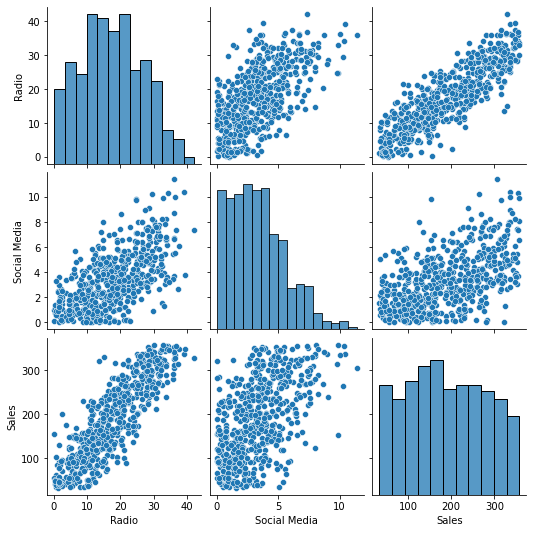

In [6]:
# ploting a pairwise graph
sns.pairplot(marketing)
plt.show()

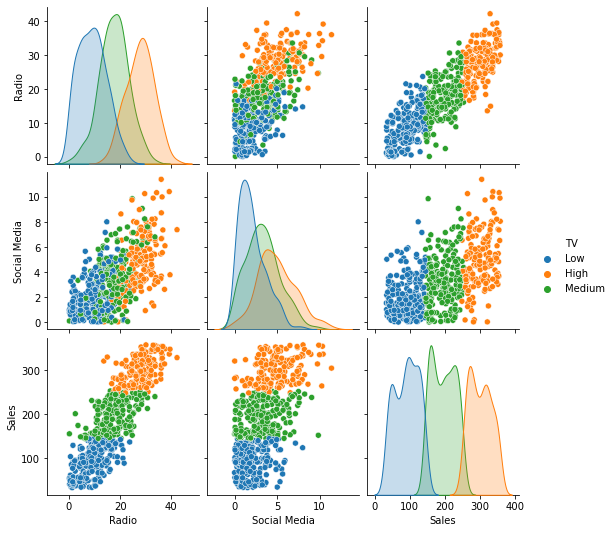

In [7]:
# adding hue to it
sns.pairplot(marketing,hue='TV')
plt.show()

In [8]:
# Select relevant columns
# Save resulting dataframe in a separate variable to prepare for regression

ols_data = marketing[["Radio", "Sales"]]

# Take a look at the subset to make sure it looks right

ols_data.head()

,Radio,Sales
0,3.518070,55.261284
1,7.756876,67.574904
2,20.348988,272.250108
3,20.108487,195.102176
4,31.653200,273.960377


In [9]:
# Write the linear regression formula
# Save it in a variable

ols_formula = "Radio ~ Sales"

# Take a look at the formula to make sure it looks righ

ols_formula

'Radio ~ Sales'

In [10]:
# Implement OLS# Fit the model to the data
# Save the fitted model in a variable
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
OLS = ols(formula = ols_formula, data = ols_data)

In [11]:
# Get summary of results 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Radio   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          4.38e-167
Time:                        23:51:41   Log-Likelihood:                -1705.0
No. Observations:                 572   AIC:                             3414.
Df Residuals:                     570   BIC:                             3423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7292      0.466      1.565      0.118      -0.186       1.644
Sales          0.0887      0.002     39.887      0.000       0.084       0.093
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.202
Skew:                          -0.046   Prob(JB):                        0.904
Kurtosis:                       3.013   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# checking if the assumption of homoscedasticity is met
# Get the X values

X = ols_data["Sales"]

# Get the fitted values

fitted_values = model.predict(X)

# Create a scatter plot

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

NameError: name 'residuals' is not defined

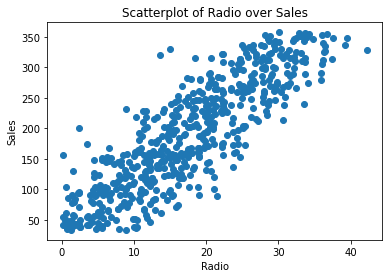

In [13]:
# Check if linearity assumption is met

### YOUR CODE HERE

plt.scatter(ols_data["Radio"], ols_data["Sales"])
plt.title("Scatterplot of Radio over Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.show()

In [14]:
marketing.rename(columns = {'Social Media':'Social'}, inplace = True)

In [15]:
# Isolate the independent variables

X = marketing[["Radio", "Social", "TV"]]
X.head()

,Radio,Social,TV
0,3.518070,2.293790,Low
1,7.756876,2.572287,Low
2,20.348988,1.227180,High
3,20.108487,2.728374,Medium
4,31.653200,7.776978,High


In [16]:
# Isolate the dependent variable

y = marketing[["Sales"]]
y.head()

,Sales
0,55.261284
1,67.574904
2,272.250108
3,195.102176
4,273.960377


In [17]:
# Split the dataset into 70% training set and 30% testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [18]:
# Take a look at the first few rows of features in training set

X_train.head()

,Radio,Social,TV
149,12.637586,0.308468,Low
124,9.847550,0.553309,Low
428,34.038368,3.568005,High
196,22.370306,0.171148,High
264,10.823165,0.023109,Low


In [19]:
# Take a look at the first few rows of features in testing set

X_test.head()

,Radio,Social,TV
512,10.429066,4.376000,Low
70,15.025210,4.472240,Medium
131,22.259930,3.354030,High
404,6.352914,5.654725,Low
543,28.039573,2.832570,High


In [20]:
# Take a look at the first few rows of labels in training set

y_train.head()

,Sales
149,112.814794
124,109.553769
428,349.208986
196,257.672781
264,94.736895


In [21]:
# Take a look at the first few rows of labels in testing set

y_test.head()

,Sales
512,138.431595
70,151.755395
131,283.251107
404,64.560535
543,335.604322


In [22]:
# Specify the formula for OLS

ols_formula = "Sales ~ Radio+ Social+ C(TV)"
ols_formula

'Sales ~ Radio+ Social+ C(TV)'

In [23]:
# Specify the data that will be used for OLS

ols_data = pd.concat([X_train, y_train], axis = 1)
ols_data.head()

,Radio,Social,TV,Sales
149,12.637586,0.308468,Low,112.814794
124,9.847550,0.553309,Low,109.553769
428,34.038368,3.568005,High,349.208986
196,22.370306,0.171148,High,257.672781
264,10.823165,0.023109,Low,94.736895


In [24]:
# Instantiate OLS object

OLS = ols(formula = ols_formula, data = ols_data)
OLS

In [46]:
# Fit the OLS object to the training data, save the resulting model

model = OLS.fit()
model

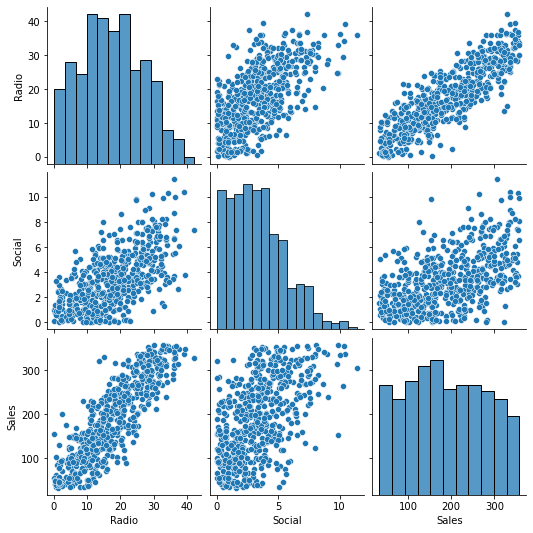

In [25]:
# Visualize pairwise relationships between variables in the data

sns.pairplot(data=marketing)
plt.show()

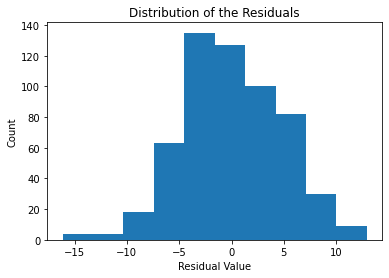

In [26]:
# Get the residuals from the model

### YOUR CODE HERE

residuals = model.resid

# Check if the residuals are normally distributed

### YOUR CODE HERE

plt.hist(residuals)
plt.title("Distribution of the Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Count")
plt.show()

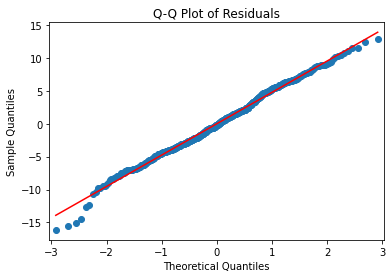

In [27]:
# Create a Q-Q plot to confirm normality assumption 

### YOUR CODE HERE

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [28]:
### YOUR CODE HERE

fitted_values = model.predict(X_train)

# Create a scatter plot

### YOUR CODE HERE

plt.scatter(fitted_values, residuals)
plt.axhline(0)
plt.title("Scatterplot of Residuals over Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Sales' is not defined
    Radio ~ Sales
            ^^^^^

In [51]:
# Display summary of model results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     927.6
Date:                Sun, 20 Nov 2022   Prob (F-statistic):          2.79e-199
Time:                        23:40:26   Log-Likelihood:                -1897.3
No. Observations:                 400   AIC:                             3805.
Df Residuals:                     395   BIC:                             3824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         214.4472      7.811     27.453      0.000     199.090     229.804
C(TV)[T.Low]     -148.2525      6.144    -24.128      0.000    -160.332    -136.173
C(TV)[T.Medium]   -70.2870      4.519    -15.555      0.000     -79.171     -61.403
Radio               3.0036      0.277     10.853      0.000       2.460       3.548
Social              0.0349      0.808      0.043      0.966      -1.553       1.623
==============================================================================
Omnibus:                       46.648   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.413
Skew:                           0.047   Prob(JB):                      0.00122
Kurtosis:                       2.108   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""